In [1]:
# 이동평균선
# 볼린저벤드
# RSI
# MACD
# (stochastic)

In [2]:
# 이동평균선

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import FinanceDataReader as fdr

In [5]:
df = fdr.DataReader('005930', '2020', '2022')

In [6]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [16]:
df['Close']/df['Close'].shift(1)

Date
2020-01-02         NaN
2020-01-03    1.005435
2020-01-06    1.000000
2020-01-07    1.005405
2020-01-08    1.017921
                ...   
2021-12-24    1.007509
2021-12-27    0.996273
2021-12-28    1.001247
2021-12-29    0.981320
2021-12-30    0.993655
Name: Close, Length: 496, dtype: float64

In [7]:
df['Close']/df['Close'].shift(1) -1

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [27]:
df['Close'].pct_change(1)

Date
2020-01-02         NaN
2020-01-03    0.005435
2020-01-06    0.000000
2020-01-07    0.005405
2020-01-08    0.017921
                ...   
2021-12-24    0.007509
2021-12-27   -0.003727
2021-12-28    0.001247
2021-12-29   -0.018680
2021-12-30   -0.006345
Name: Close, Length: 496, dtype: float64

In [28]:
df['return'] = df['Change'] + 1

In [29]:
df.head()

,Open,High,Low,Close,Volume,Change,return
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921


In [38]:
(df['return'].iloc[0] + df['return'].iloc[1]) / 2 

0.9973410472183263

In [12]:
# 누적 수익률

df['return'].cumprod()

Date
2020-01-02    0.989247
2020-01-03    0.994624
2020-01-06    0.994624
2020-01-07    1.000000
2020-01-08    1.017921
                ...   
2021-12-24    1.442652
2021-12-27    1.437276
2021-12-28    1.439068
2021-12-29    1.412186
2021-12-30    1.403226
Name: return, Length: 496, dtype: float64

In [ ]:
# 이동평균선

In [14]:
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-24    80500
2021-12-27    80200
2021-12-28    80300
2021-12-29    78800
2021-12-30    78300
Name: Close, Length: 496, dtype: int64

In [43]:
df['20ma'] = df['Close'].rolling(20).mean()
df['60ma'] = df['Close'].rolling(60).mean()

<AxesSubplot:xlabel='Date'>

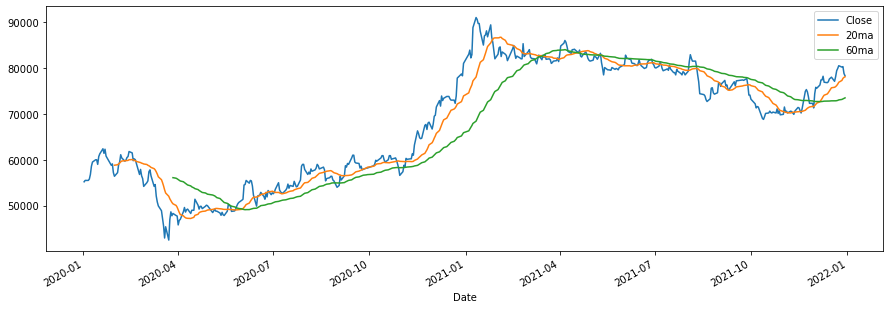

In [25]:
df[['Close','20ma','60ma']].plot(figsize=(15,5))

In [57]:
# 지수 이동평균선 : 현재와 가까운 값에 더 큰 가중치를 주어서 계산한 평균값

In [58]:
df['20ewma'] = df['Close'].ewm(span=20).mean()
df['60ewma'] = df['Close'].ewm(span=60).mean()

<AxesSubplot:xlabel='Date'>

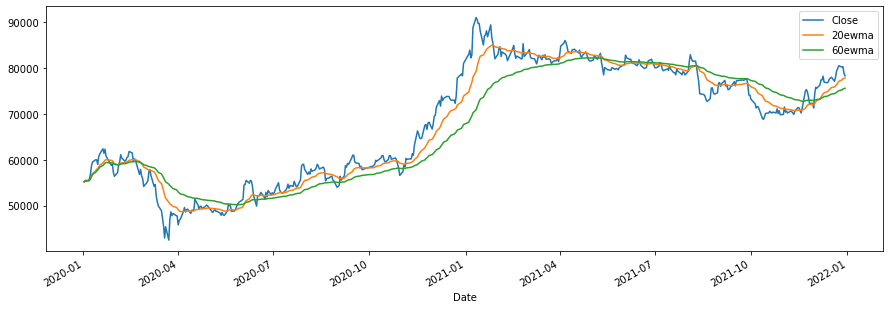

In [59]:
df[['Close','20ewma','60ewma']].plot(figsize=(15,5))

In [60]:
df.head()

,Open,High,Low,Close,Volume,Change,return,20ma,60ma,20ewma,60ewma
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,0.989247,NaN,NaN,55200.000000,55200.000000
2020-01-03,56000,56600,54900,55500,15422255,0.005435,1.005435,NaN,NaN,55357.500000,55352.500000
2020-01-06,54900,55600,54600,55500,10278951,0.000000,1.000000,NaN,NaN,55409.825146,55403.314508
2020-01-07,55700,56400,55600,55800,10009778,0.005405,1.005405,NaN,NaN,55522.462594,55507.498611
2020-01-08,56200,57400,55900,56800,23501171,0.017921,1.017921,NaN,NaN,55831.488021,55783.514535


In [61]:
df.Close

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-12-24    80500
2021-12-27    80200
2021-12-28    80300
2021-12-29    78800
2021-12-30    78300
Name: Close, Length: 496, dtype: int64

In [63]:
df['Close'].asfreq('D')

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2021-12-26        NaN
2021-12-27    80200.0
2021-12-28    80300.0
2021-12-29    78800.0
2021-12-30    78300.0
Freq: D, Name: Close, Length: 729, dtype: float64

In [64]:
df['Close'].asfreq('3D')

Date
2020-01-02    55200.0
2020-01-05        NaN
2020-01-08    56800.0
2020-01-11        NaN
2020-01-14    60000.0
               ...   
2021-12-16    77800.0
2021-12-19        NaN
2021-12-22    79400.0
2021-12-25        NaN
2021-12-28    80300.0
Freq: 3D, Name: Close, Length: 243, dtype: float64

In [65]:
df['Close'].resample('M').mean()

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: Close, dtype: float64

In [66]:
df['Close'].resample('Q').mean()

Date
2020-03-31    55833.870968
2020-06-30    50483.606557
2020-09-30    56562.500000
2020-12-31    65783.606557
2021-03-31    83886.666667
2021-06-30    81795.238095
2021-09-30    77709.677419
2021-12-31    73433.333333
Freq: Q-DEC, Name: Close, dtype: float64

In [40]:
df['Close'].resample('W').mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
               ...   
2021-12-05    73880.0
2021-12-12    77240.0
2021-12-19    77440.0
2021-12-26    79000.0
2022-01-02    79400.0
Freq: W-SUN, Name: Close, Length: 105, dtype: float64

In [43]:
# bollinger band

In [68]:
df = fdr.DataReader('005930', '2020', '2023')

In [69]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-04-21,67600,68300,67500,67700,12847448,0.004451
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448
2022-04-26,66400,66700,66100,66100,12946923,-0.003017
2022-04-27,65400,65500,64900,65000,17991668,-0.016641


In [70]:
df['ma20'] = df['Close'].rolling(20).mean()

In [71]:
df.head()

,Open,High,Low,Close,Volume,Change,ma20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN


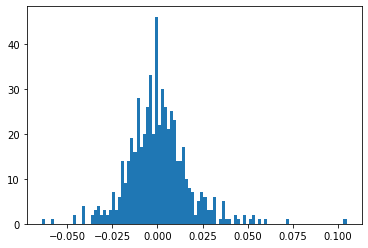

In [189]:
plt.hist(df.Change, bins=100)
plt.show()

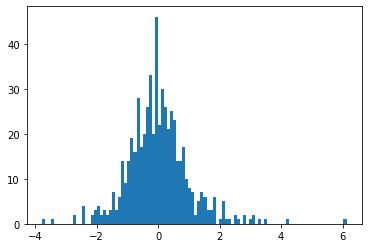

In [190]:
plt.hist((df.Change - df.Change.mean())/df.Change.std(), bins=100)
plt.show()

In [102]:
df['Close'].std()

11827.691069932118

In [100]:
np.square(4)

16

In [101]:
np.sqrt(sum((df['Close'] - np.mean(df['Close'])) ** 2) / len(df['Close']))

11817.383711922075

In [191]:
# 표준정규분포 : 평균이 0이고, 표준편차가 1인 좌우대칭인 정규분포
# 표준편차 : 데이터들의 평균과의 차이(편차)의 평균, 데이터가 평균에서 얼마나 떨어져 있는가..

# 정규분포의 성질
#  1. 평균에서 +- 1표준편차의 범위에 68.2%의 데이터가 존재
#  2. 평균에서 +- 2표준편차의 범위에 95%의 데이터가 존재
#  3. 평균에서 +- 3펴즌편차의 범위에 99.7%의 데이터가 존재

In [192]:
df['stddev'] = df['Close'].rolling(20).std()

In [193]:
df

,Open,High,Low,Close,Volume,Change,ma20,stddev
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451,68395.0,1146.837758
2022-04-22,67200,67300,66700,67000,11791478,-0.010340,68255.0,1137.159434
2022-04-25,66500,66700,66300,66300,11016474,-0.010448,68085.0,1163.603749


In [194]:
df['upper_b'] = df['ma20'] + (df['stddev']*2)
df['lower_b'] = df['ma20'] - (df['stddev']*2)

In [195]:
df.head(2)

,Open,High,Low,Close,Volume,Change,ma20,stddev,upper_b,lower_b
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN,NaN,NaN,NaN


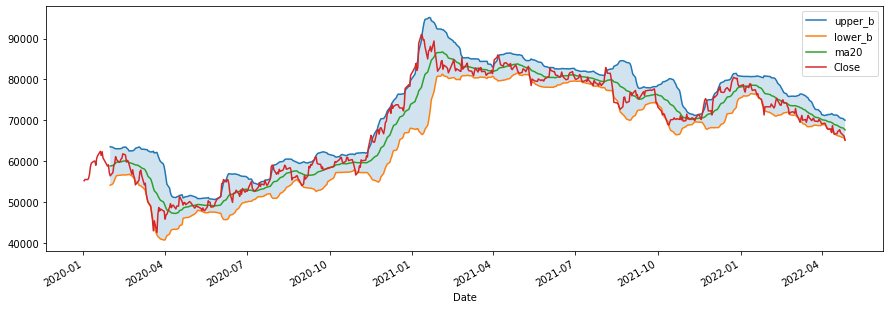

In [196]:
df[['upper_b', 'lower_b', 'ma20', 'Close']].plot(figsize=(15,5))
plt.fill_between(df.index, df.lower_b, df.upper_b, alpha=0.2)

In [198]:
df.drop(['Open', 'High', 'Low', 'Volume', 'Change'], axis=1, inplace=True)

In [199]:
df.head()

,Close,ma20,stddev,upper_b,lower_b
Date,,,,,
2020-01-02,55200,NaN,NaN,NaN,NaN
2020-01-03,55500,NaN,NaN,NaN,NaN
2020-01-06,55500,NaN,NaN,NaN,NaN
2020-01-07,55800,NaN,NaN,NaN,NaN
2020-01-08,56800,NaN,NaN,NaN,NaN


In [216]:
df['stock_pos'] = 0
df['buy_sig'] = (df['stock_pos'].shift(1)== 0) & (df['Close'] <= df['lower_b'])
df['sell_sig'] = (df['Close'].shift(1) > df['ma20'].shift(1)) & (df['Close'] < df['ma20'])

In [217]:
df['buy_sig'] = df['buy_sig'].apply(int)
df['sell_sig'] = df['sell_sig'].apply(int)

In [220]:
con_df = df[(df.buy_sig == 1) | (df.sell_sig == 1)].sort_index()

In [223]:
con_df = con_df.loc['2020-02-28':]

In [228]:
pd.set_option('display.max_rows', 500)

In [229]:
con_df

,Close,ma20,stddev,upper_b,lower_b,stock_pos,buy_sig,sell_sig
Date,,,,,,,,
2020-02-28,54200,59085.0,2030.368128,63145.736257,55024.263743,0,1,0
2020-03-12,50800,56880.0,2980.038855,62840.077711,50919.922289,0,1,0
2020-03-13,49950,56287.5,3124.852628,62537.205256,50037.794744,0,1,0
2020-03-16,48900,55657.5,3284.704385,62226.908769,49088.091231,0,1,0
2020-03-17,47300,55032.5,3626.447987,62285.395973,47779.604027,0,1,0
2020-03-18,45600,54302.5,3983.402242,62269.304484,46335.695516,0,1,0
2020-03-19,42950,53450.0,4491.893283,62433.786565,44466.213435,0,1,0
2020-05-04,48500,49180.0,1054.988152,51289.976303,47070.023697,0,0,1
2020-05-22,48750,49140.0,803.544778,50747.089556,47532.910444,0,0,1


In [242]:
buy_df = con_df[(con_df['buy_sig'] == 1) & (con_df['buy_sig'].shift(1) == 0)].loc['2020-08-31':'2022-02-11']

In [243]:
sell_df = con_df[(con_df['sell_sig'] == 1) & (con_df['sell_sig'].shift(1) ==0)].loc['2020-08-31':'2022-02-11']

In [250]:
buy_df

,Close,ma20,stddev,upper_b,lower_b,stock_pos,buy_sig,sell_sig
Date,,,,,,,,
2020-08-31,54000,56980.0,1313.332443,59606.664886,54353.335114,0,1,0
2020-10-30,56600,59660.0,1118.928058,61897.856117,57422.143883,0,1,0
2021-05-12,80000,82580.0,1070.956287,84721.912574,80438.087426,0,1,0
2021-08-13,74400,79415.0,1891.608895,83198.217789,75631.782211,0,1,0
2021-09-29,74100,76350.0,943.398113,78236.796226,74463.203774,0,1,0
2022-01-25,74000,77515.0,1495.704376,80506.408751,74523.591249,0,1,0


In [251]:
sell_df

,Close,ma20,stddev,upper_b,lower_b,stock_pos,buy_sig,sell_sig
Date,,,,,,,,
2020-09-24,57800,57840.0,2211.072614,62262.145228,53417.854772,0,0,1
2021-01-27,85600,86245.0,3453.674626,93152.349252,79337.650748,0,0,1
2021-06-14,80500,80610.0,974.895406,82559.790812,78660.209188,0,0,1
2021-09-02,76000,76335.0,2949.982159,82234.964317,70435.035683,0,0,1
2021-11-05,70200,70250.0,692.440383,71634.880766,68865.119234,0,0,1
2022-02-11,74900,75140.0,1972.815247,79085.630495,71194.369505,0,0,1


In [253]:
sell_df.Close.values - buy_df.Close.values

array([ 3800, 29000,   500,  1600, -3900,   900], dtype=int64)

In [257]:
buy_df[['Close','ma20']].reset_index()

,Date,Close,ma20
0,2020-08-31,54000,56980.0
1,2020-10-30,56600,59660.0
2,2021-05-12,80000,82580.0
3,2021-08-13,74400,79415.0
4,2021-09-29,74100,76350.0
5,2022-01-25,74000,77515.0


In [260]:
sell_df[['Close', 'ma20']].reset_index()

,Date,Close,ma20
0,2020-09-24,57800,57840.0
1,2021-01-27,85600,86245.0
2,2021-06-14,80500,80610.0
3,2021-09-02,76000,76335.0
4,2021-11-05,70200,70250.0
5,2022-02-11,74900,75140.0


In [262]:
merge_df = pd.merge(buy_df[['Close','ma20']].reset_index(), sell_df[['Close', 'ma20']].reset_index(), right_index=True, left_index=True)

In [265]:
merge_df['margin'] = merge_df['Close_y'] - merge_df['Close_x']

In [266]:
merge_df['return'] = (merge_df['margin']/merge_df['Close_x']) +1

In [268]:
merge_df['cu_return'] = merge_df['return'].cumprod()

In [269]:
merge_df

,Date_x,Close_x,ma20_x,Date_y,Close_y,ma20_y,margin,return,cu_return
0,2020-08-31,54000,56980.0,2020-09-24,57800,57840.0,3800,1.070370,1.070370
1,2020-10-30,56600,59660.0,2021-01-27,85600,86245.0,29000,1.512367,1.618793
2,2021-05-12,80000,82580.0,2021-06-14,80500,80610.0,500,1.006250,1.628911
3,2021-08-13,74400,79415.0,2021-09-02,76000,76335.0,1600,1.021505,1.663941
4,2021-09-29,74100,76350.0,2021-11-05,70200,70250.0,-3900,0.947368,1.576365
5,2022-01-25,74000,77515.0,2022-02-11,74900,75140.0,900,1.012162,1.595537


In [ ]:
# RSI

# 기간 = 14일
# 가격이 전일 보다 상승한 날의 상승분은 U
# 가격이 전일 보다 하락한 날의 하락분은 D

# U의 평균값을 AU
# D의 평균값을 AD

# RSI = AU/(AU + AD)  => 1 ~ 0

# 0.7 이상이면 과열
# 0.3 이하면 침체..

In [130]:
df = fdr.DataReader('005930', '2020', '2021')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


In [131]:
def UD(diff):
    ups = 0
    downs = 0
    
    if diff > 0:
        ups = diff
    elif diff < 0:
        downs = abs(diff)
        
    return pd.Series([ups, downs])        

In [133]:
df['diff'] = df['Close'] - df['Close'].shift(1)

In [135]:
df['diff']

Date
2020-01-02       NaN
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
               ...  
2020-12-23    1600.0
2020-12-24    3900.0
2020-12-28     900.0
2020-12-29    -400.0
2020-12-30    2700.0
Name: diff, Length: 248, dtype: float64

In [136]:
df[['up', 'down']] = df['diff'].apply(UD)

In [139]:
df.head(2)

,Open,High,Low,Close,Volume,Change,diff,up,down
Date,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,0.0,0.0
2020-01-03,56000,56600,54900,55500,15422255,0.005435,300.0,300.0,0.0


In [141]:
df['AU'] = df['up'].rolling(14).mean()
df['AD'] = df['down'].rolling(14).mean()

In [143]:
df.head(2)

,Open,High,Low,Close,Volume,Change,diff,up,down,AU,AD
Date,,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,0.0,0.0,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,300.0,300.0,0.0,NaN,NaN


In [145]:
df['RSI'] = df['AU']/(df['AU'] + df['AD'])

In [147]:
df['RSI_sig'] = df['RSI'].rolling(6).mean()

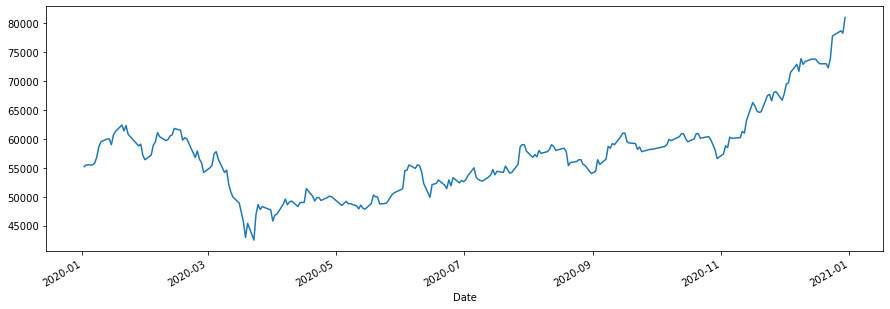

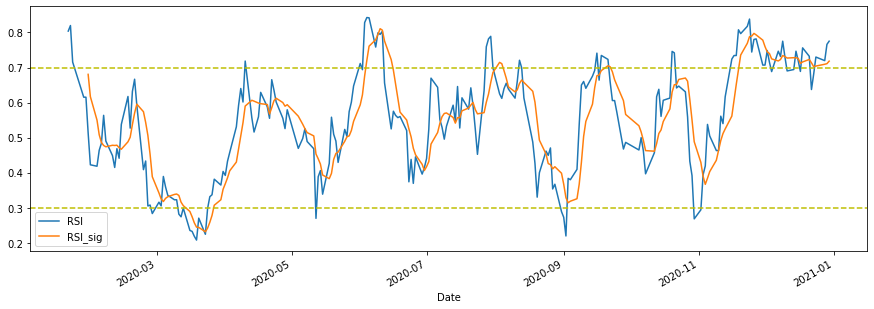

In [157]:
df['Close'].plot(figsize=(15,5))
df[['RSI', 'RSI_sig']].plot(figsize=(15,5))
plt.axhline(0.7,  c='y', ls='--')
plt.axhline(0.3,  c='y', ls='--')

In [ ]:
# MACD

# 단기이평(12) - 장기이평(26)
# Macd signal : macd 9ma

In [158]:
df = fdr.DataReader('005930', '2020', '2023')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-04-21,67600,68300,67500,67700,12847448,0.004451
2022-04-22,67200,67300,66700,67000,11791478,-0.010340
2022-04-25,66500,66700,66300,66300,11016474,-0.010448


In [159]:
df['ema_short'] = df['Close'].ewm(12).mean()
df['ema_long'] = df['Close'].ewm(26).mean()

<AxesSubplot:xlabel='Date'>

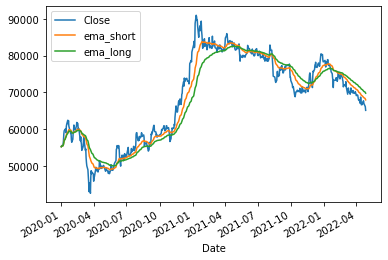

In [161]:
df[['Close', 'ema_short', 'ema_long']].plot()

In [164]:
df['macd'] = df['ema_short'] - df['ema_long']
df['macd_signal']  = df['macd'].ewm(9).mean()
df['macdhist'] = df['macd'] - df['macd_signal']

In [181]:
df_macd = df[['Close', 'macd', 'macd_signal', 'macdhist']].div(df['Close'], axis=0)

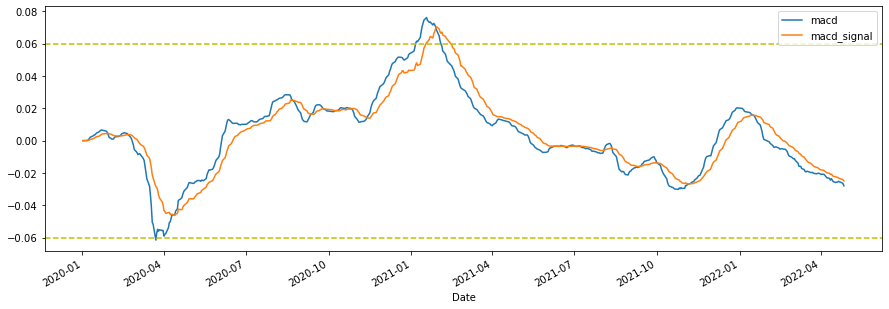

In [184]:
df_macd[['macd', 'macd_signal']].plot(figsize=(15,5))

plt.axhline(0.06,  c='y', ls='--')
plt.axhline(-0.06,  c='y', ls='--')

<AxesSubplot:xlabel='Date'>

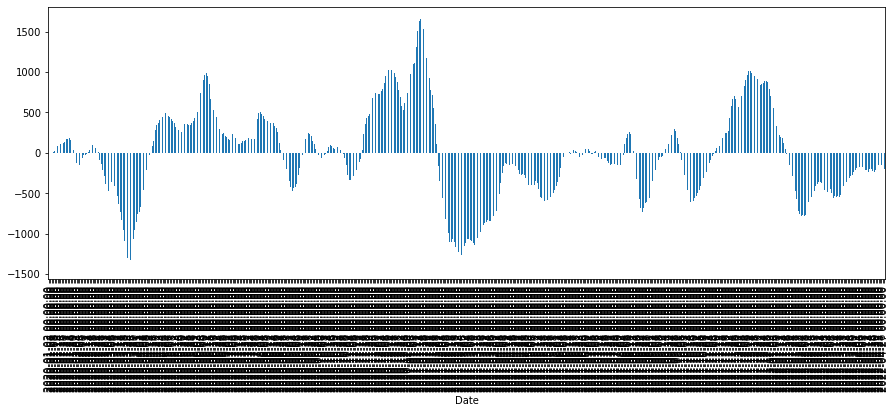

In [180]:
df['macdhist'].plot(kind='bar', figsize=(15,5))